## Metropolis Monte Carlo Part 2
### Lexin Chen

$V_2(x)=D_e\left(1-e^{-\alpha(x-x_0)}\right)^2$ with $D_e=10$, $\alpha=0.31$, $x_0=5$ and the units of $V_2$ in kcal/mol with x in the range 0 to 10.

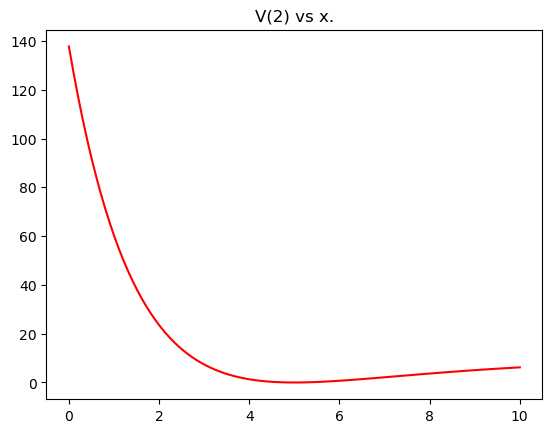

In [6]:
import matplotlib.pyplot as plt
import numpy as np

De = 10
a = 0.31
x0 = 5
x = np.linspace(0, 10, 100)
y= De * (1 - np.exp( -a * (x - x0))) ** 2
plt.title("V(2) vs x.")
plt.plot(x, y, color='red')

Compute and plot $P(x)$ for $V_1$ above, assuming a Boltzmann distribution at three temperatures, 100K, 300K and 1000K.

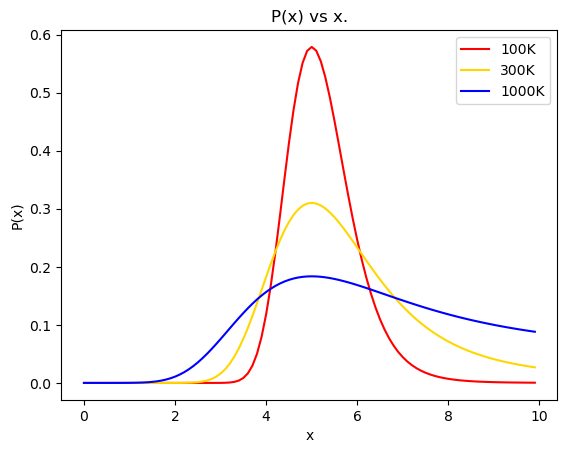

In [11]:

import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 

De = 10
a = 0.31
x0 = 5
t1 = 100 
t2 = 300
t3 = 1000
kB = 8.314e-3
list = np.arange(0, 10, .1)
f= lambda x:exp(-De * (1 - exp( -a * (x - x0))) ** 2 / kB / t1) 
j = scipy.integrate.quad(f, 0, 10)

p8 = []
for i in list:
  num = exp(-De * (1 - exp( -a * (i - x0))) ** 2 / kB / t1) 
  p8.append(num/j[0])

p2=[]
f= lambda x:exp((-10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / t2) 
j = scipy.integrate.quad(f, 0, 10)

for i in list:
  num1 = math.pow(math.e,(-10 * (1 - exp( -0.31 * (i - 5))) ** 2)/(kB * t2)) #p(x)=e^(-v(x)/kBT)/integral of same thing
  p2.append(num1 / j[0])

p3 = []
def f(x):
 return exp((-10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / t3) 
j = scipy.integrate.quad(f, 0, 10)
for i in list:
  num2 = math.pow(math.e,(-10 * (1 - exp( -0.31 * (i - 5))) ** 2)/(kB * t3)) #p(x)=e^(-v(x)/kBT)
  p3.append(num2 / j[0])

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.plot(list, p8,color='red',label='100K')
plt.plot(list, p2,color='gold',label='300K')
plt.plot(list, p3,color='blue',label='1000K')
plt.legend()

Compute $\langle x \rangle$.

9.046904623294301 / 1.727784507311328
18.462794764847892 / 3.2241818546066514
33.12016920486897 / 5.4462713630143025


<function matplotlib.pyplot.show(close=None, block=None)>

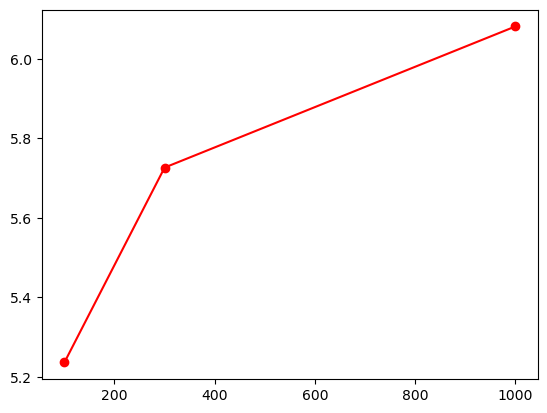

In [12]:

import scipy.integrate
from numpy import exp
import matplotlib.pyplot as plt
import numpy as np
import random
import math 
t1=100 
t2=300
t3=1000
k=1
kB=8.314e-3
average = []

for n in [t1, t2, t3]:
  def f(x):
    return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  g = lambda x: x * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  average.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

Compute $\langle x^2 \rangle$.

48.373630355097646 / 1.727784507311328
112.49884276346837 / 3.2241818546066514
222.2603504167122 / 5.4462713630143025


<function matplotlib.pyplot.show(close=None, block=None)>

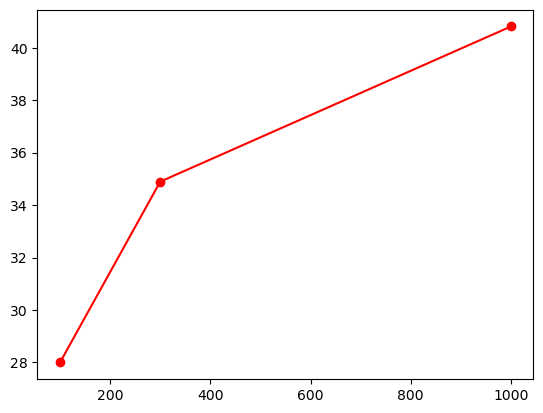

In [13]:
average1 = []

for n in [t1, t2, t3]:
    def f(x):
        return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
    g = lambda x: x**2 * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
    k1 = scipy.integrate.quad(f, 0, 10)
    k2 = scipy.integrate.quad(g, 0, 10)
    print('{} / {}'.format(k2[0], k1[0]))

    average1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

Compute $\langle V_1\rangle$.

0.7934224436587274 / 1.727784507311328
4.388200421574912 / 3.2241818546066514
14.467408475530634 / 5.4462713630143025


<function matplotlib.pyplot.show(close=None, block=None)>

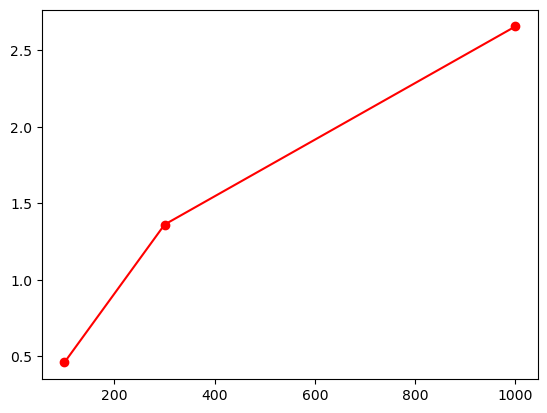

In [14]:
V1 = []
#V1.clear()
for n in [t1, t2, t3]:
  def f(x):
    return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  g = lambda x: 10 * (1 - exp( -0.31 * (x - 5))) ** 2 * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
  k1 = scipy.integrate.quad(f, 0, 10)
  k2 = scipy.integrate.quad(g, 0, 10)
  print('{} / {}'.format(k2[0], k1[0]))

  V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show

### Metropolis Monte Carlo python program to sample the Boltzmann distribution for $V_2$
Discard first 10% of accepted moves.

$P(x)$ at 100K

Number of energies: 99000
Number of accept: 23827, Number of rejects: 76173


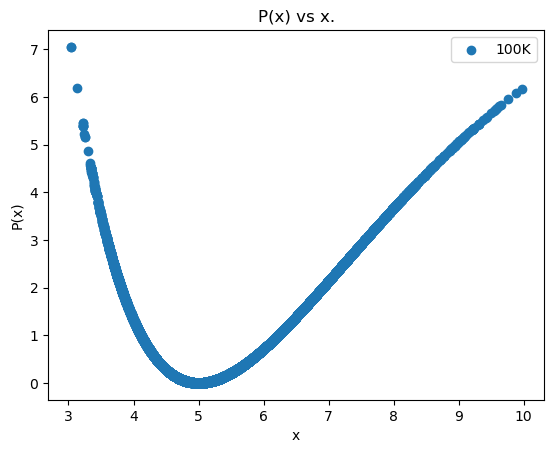

In [18]:
import random
import math
import matplotlib.pyplot as plt

kB = 8.314e-3 # R
De = 10
a = 0.31
x0 = 5
T = 100

def V1(x):
  return De * (1 - math.pow(math.e, -a * (x - x0))) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list3 =[] # creating a list for all the steps partook
eng_list3 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list3.append(new_energy) 
    steps_list3.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list3.append(old_energy)
    steps_list3.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list3 = steps_list3[1000:] #get rid of first 10% of steps
eng_list3 = eng_list3[1000:] #get rid of first 10% of energies
print(f"Number of energies: {len(eng_list3)}") # proof that first 10% of the numbers were discarded
print(f"Number of accept: {naccept}, Number of rejects: {nreject}")

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.scatter(steps_list3, eng_list3, label='100K')
plt.legend()

**Probability Density at 100K**

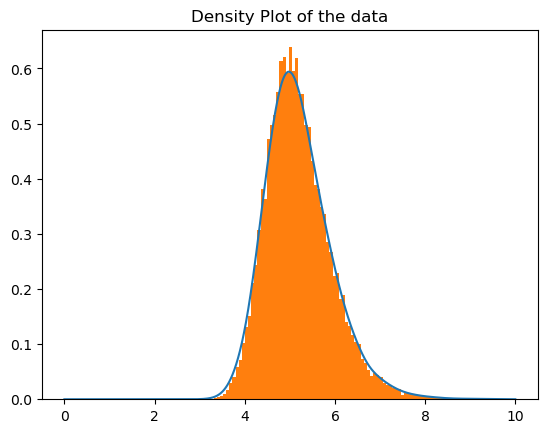

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

prob_density = gaussian_kde(steps_list3)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0, 10, 10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list3, bins=100, density = True)
plt.show()

$P(x)$ at 300K

total steps: 99000
accept: 47638 + reject: 52362


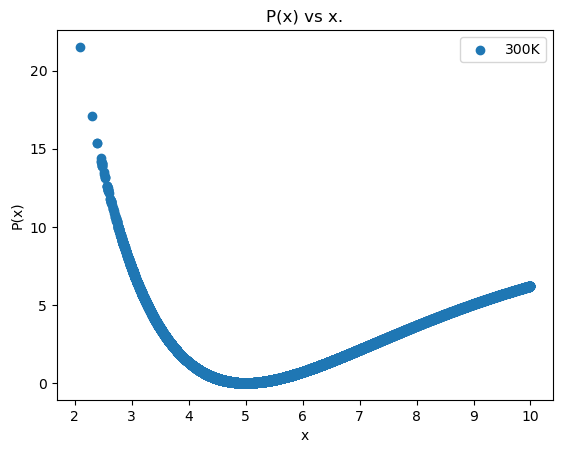

In [31]:
import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
De = 10
a = 0.31
x0 = 5
T = 300

def V1(x):
  return De * (1 - math.pow(math.e, -a * (x - x0))) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list4 =[] # creating a list for all the steps partook
eng_list4 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject = 0
naccept = 0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins
  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list4.append(new_energy) 
    steps_list4.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list4.append(old_energy)
    steps_list4.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list4 = steps_list4[1000:] #get rid of first 10% of steps
eng_list4 = eng_list4[1000:] #get rid of first 10% of energies
print(f"total steps: {len(eng_list4)}") #proofs that first 10% of the numbers were discarded
print('accept: {} + reject: {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.scatter(steps_list4,eng_list4,label='300K')
plt.legend()

Probability Density at 300K

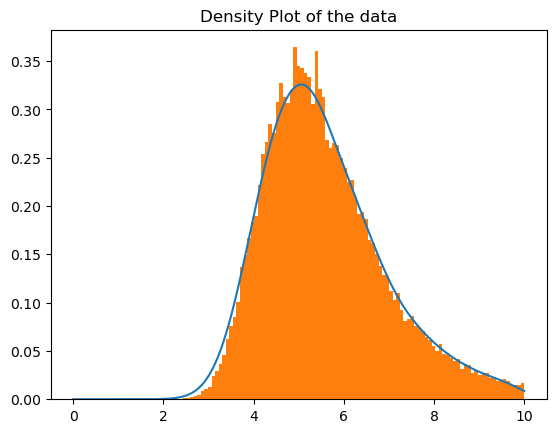

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

prob_density = gaussian_kde(steps_list4)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0, 10, 10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list4, bins=100,density=True)
plt.show()

$P(x)$ at 1000K

total steps: 100000
Accept: 71446 + Reject: 28554


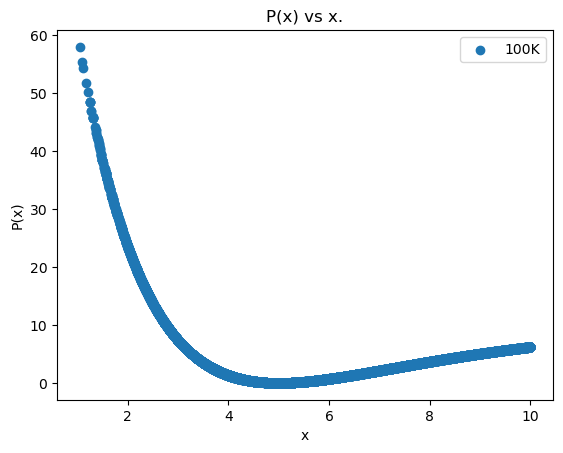

In [33]:
#4b - 1000 K

import random
import math
import matplotlib.pyplot as plt
kB = 8.314e-3 # R
De = 10
a = 0.31
x0 = 5
T = 1000

def V1(x):
  return De * (1 - math.pow(math.e, -a * (x - x0))) ** 2 # defining equation for boltzmann distribution

old_num = random.uniform(0,10) # picking a random number between 0 to 10
steps_list5 =[] # creating a list for all the steps partook
eng_list5 = [] # list of corresponding energies

D = 5 # defining the range that it shall move along the x-axis
delta_x = random.uniform(-D, D)
num = old_num + delta_x # moving the old_num along some value

while num < 0 or num > 10:
  delta_x = random.uniform(-D, D)
  num = old_num + delta_x

accept = False
nreject=0
naccept=0
# Automatically accept if the energy goes down
for i in range(100000): # defining the # of bins

  new_energy=V1(num) # calculate the new energy
  old_energy=V1(old_num)
  
  dE = new_energy - old_energy 
  if (dE <= 0): 
    accept = True # accept the move if the difference between old and energy energy is less than 0
    
  else:
    # Now apply the Monte Carlo test - compare
    # exp( -(E_new - E_old) / kT ) >= rand(0,1)
    x = math.exp( -(dE) / (kB*T) )
    #print(x)
    if (x >= random.uniform(0.0,1.0)):
      accept = True
      
    else:
      accept = False
      
  if accept == True:
    naccept += 1 # if move accepted +1
    eng_list5.append(new_energy) 
    steps_list5.append(num)
    old_num = num # replace the num as old_num so it can go into the loop again with an updated number
    old_energy = new_energy
  else:
    nreject += 1 # reject the move - restore the old number
    eng_list5.append(old_energy)
    steps_list5.append(old_num)

  delta_x = random.uniform(-D, D) # move again
  num = old_num + delta_x
  while num < 0 or num > 10:
    delta_x = random.uniform(-D, D)
    num = old_num + delta_x

T = 100
V1 = lambda x: math.pow(math.e, (-k * (x - 5) ** 2) / kB / T)

steps_list4 = steps_list5[1000:] #get rid of first 10% of steps
eng_list4 = eng_list5[1000:] #get rid of first 10% of energies
print(f"total steps: {len(eng_list5)}") #proofs that first 10% of the numbers were discarded
print('Accept: {} + Reject: {}'.format(naccept, nreject))

plt.title("P(x) vs x.")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.scatter(steps_list5,eng_list5,label='100K')
plt.legend()

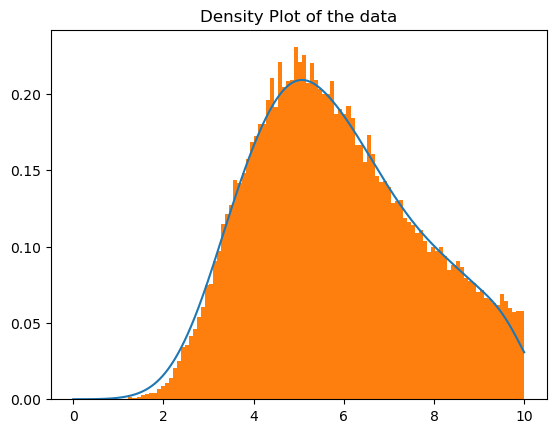

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

prob_density = gaussian_kde(steps_list5)
prob_density.covariance_factor = lambda : .25
prob_density._compute_covariance()

x = np.linspace(0, 10, 10000)
y=prob_density(x)

plt.plot(x, y)
plt.title("Density Plot of the data")
plt.hist(steps_list5, bins=100, density=True)
plt.show()

Compute $\langle x \rangle$.

<function matplotlib.pyplot.show(close=None, block=None)>

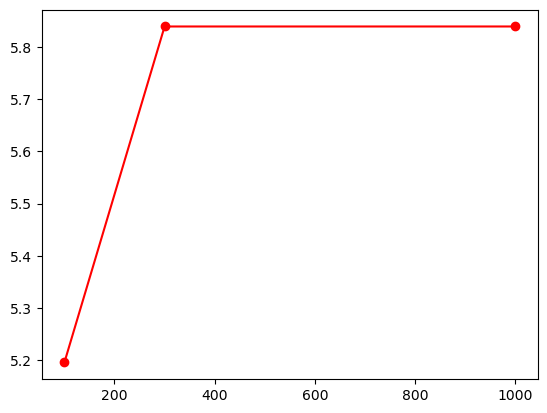

In [36]:
average = []

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg
for i in [steps_list3, steps_list4, steps_list5]:
  average.append(cal_average(i))
plt.plot([t1, t2, t3], average, '-or', label='Averages')
plt.show

Compute $\langle x^2\rangle$.

<function matplotlib.pyplot.show(close=None, block=None)>

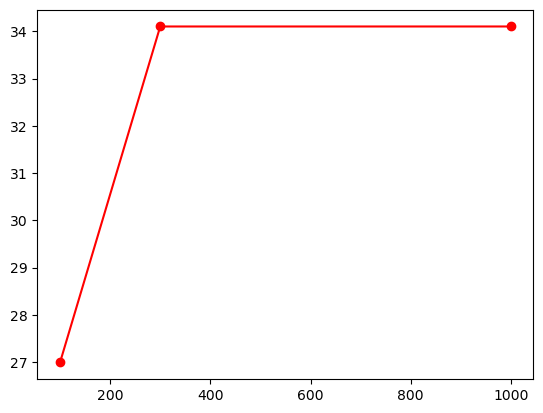

In [38]:
average1 = []

def cal_average(num):
    sum_num = 0
    for t in num:
        sum_num = sum_num + t           

    avg = sum_num / len(num)
    return avg ** 2
for i in [steps_list3,steps_list4,steps_list5]:
    average1.append(cal_average(i))
plt.plot([t1, t2, t3], average1, '-or', label='Averages')
plt.show

Compute $\langle V_1\rangle$. Dividing Second integral by first integral.

0.7934224436587274 / 1.727784507311328
4.388200421574912 / 3.2241818546066514
14.467408475530634 / 5.4462713630143025


<function matplotlib.pyplot.show(close=None, block=None)>

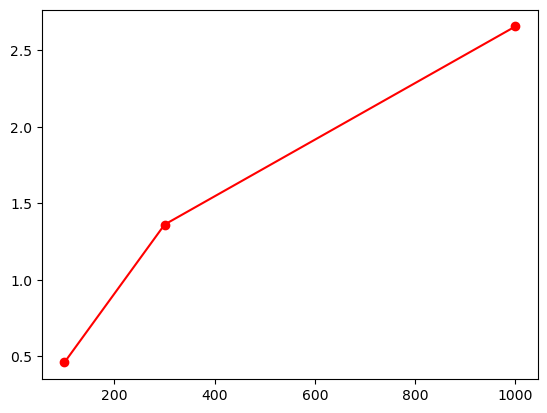

In [42]:
V1 = []
#V1.clear()
for n in [t1, t2, t3]:
    def f(x):
        return exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
    g = lambda x: 10 * (1 - exp( -0.31 * (x - 5))) ** 2 * exp(-(10 * (1 - exp( -0.31 * (x - 5))) ** 2) / kB / n)
    k1 = scipy.integrate.quad(f, 0, 10)
    k2 = scipy.integrate.quad(g, 0, 10)
    print('{} / {}'.format(k2[0], k1[0]))

    V1.append(k2[0] / k1[0])
plt.plot([t1, t2, t3], V1, '-or', label='Averages')
plt.show